In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
os.getcwd()

'C:\\Users\\tfg00\\sepsis\\code'

In [3]:
%cd "C:\\Users\\tfg00\\sepsis\\data"

C:\Users\tfg00\sepsis\data


In [4]:
os.getcwd()

'C:\\Users\\tfg00\\sepsis\\data'

In [5]:
os.listdir()

['additives.csv',
 'admissions.csv',
 'a_chartdurations.csv',
 'a_iodurations.csv',
 'a_meddurations.csv',
 'censusevents.csv',
 'chartevents.csv',
 'comorbidity_scores.csv',
 'db_schema.csv',
 'deliveries.csv',
 'demographicevents.csv',
 'demographic_detail.csv',
 'drgevents.csv',
 'd_caregivers.csv',
 'd_careunits.csv',
 'd_chartitems.csv',
 'd_chartitems_detail.csv',
 'd_codeditems.csv',
 'd_demographicitems.csv',
 'd_ioitems.csv',
 'd_labitems.csv',
 'd_meditems.csv',
 'd_parammap_items.csv',
 'd_patients.csv',
 'icd9.csv',
 'icustayevents.csv',
 'icustay_days.csv',
 'icustay_detail.csv',
 'ioevents.csv',
 'labevents.csv',
 'medevents.csv',
 'microbiologyevents.csv',
 'noteevents.csv',
 'parameter_mapping.csv',
 'poe_med.csv',
 'poe_order.csv',
 'procedureevents.csv',
 'totalbalevents.csv',
 'total_data.csv']

In [6]:
len(os.listdir())

39

In [7]:
data = pd.read_csv("chartevents.csv")

In [8]:
data.head()

,subject_id,icustay_id,itemid,charttime,elemid,realtime,cgid,cuid,value1,value1num,value1uom,value2,value2num,value2uom,resultstatus,stopped
0,56,62.0,926,17/1/2644 02:02:00,1000,17/1/2644 02:02:00,8,1,NSP,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,56,62.0,920,17/1/2644 02:02:00,1034,17/1/2644 02:02:00,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,56,62.0,69,17/1/2644 02:02:00,1033,17/1/2644 02:02:00,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,56,62.0,762,17/1/2644 02:02:00,1032,17/1/2644 02:02:00,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,56,62.0,919,17/1/2644 02:02:00,1026,17/1/2644 02:02:00,8,1,NSU,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(data.columns, len(data.columns))

Index(['subject_id', 'icustay_id', 'itemid', 'charttime', 'elemid', 'realtime',
       'cgid', 'cuid', 'value1', 'value1num', 'value1uom', 'value2',
       'value2num', 'value2uom', 'resultstatus', 'stopped'],
      dtype='object') 16


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34240621 entries, 0 to 34240620
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   subject_id    int64  
 1   icustay_id    float64
 2   itemid        int64  
 3   charttime     object 
 4   elemid        int64  
 5   realtime      object 
 6   cgid          int64  
 7   cuid          int64  
 8   value1        object 
 9   value1num     float64
 10  value1uom     object 
 11  value2        object 
 12  value2num     float64
 13  value2uom     object 
 14  resultstatus  object 
 15  stopped       object 
dtypes: float64(3), int64(5), object(8)
memory usage: 4.1+ GB


In [11]:
# value1uom에서 BPM과 

for i in data.columns:
    print("{}의 value입니다:\n ".format(i), data[i].value_counts())


subject_id의 value입니다:
  12613    329882
11923    246171
21280    203095
22818    165461
7363     137205
          ...  
9207         12
404          12
6587         12
21455        12
7027         12
Name: subject_id, Length: 3999, dtype: int64
icustay_id의 value입니다:
  14882.0    237824
15697.0    209023
23634.0    128413
26465.0    122478
15696.0    111782
            ...  
11973.0        12
13515.0        12
28289.0         8
7360.0          4
18370.0         4
Name: icustay_id, Length: 5787, dtype: int64
itemid의 value입니다:
  211     812683
742     800131
646     797054
618     774988
212     756991
         ...  
1572         1
4369         1
3038         1
3029         1
1394         1
Name: itemid, Length: 2136, dtype: int64
charttime의 value입니다:
  2/3/2721 08:00:00      401
4/12/2654 23:00:00     384
7/12/2654 19:00:00     375
16/6/2573 19:00:00     375
3/12/2654 07:00:00     373
                      ... 
28/3/2694 08:45:00       1
15/12/3294 01:00:00      1
27/3/2694 16:30:00     

In [12]:
data["value1uom"].value_counts()

mmHg      3070644
BPM       2697135
%         1322271
kg        1245803
cmH2O      584966
           ...   
mcg/ml         45
cc/kg/         39
mEq/l           8
mcg             1
In              1
Name: value1uom, Length: 62, dtype: int64

In [13]:
data["value1uom"].unique()

array([nan, 'mg/dl', '%', 'mEq/L', 'gm/dl', '/mic l', 'BPM', 'mmHg',
       'Deg. C', 'kg', 'Deg. F', 'points', 'lpm', 'number', '#', 'ml/B',
       'cmH2O', 'ml/cmH', 'L/min', 'L/m', 'torr', 'ml/dl', 'g * m', 'm2',
       'inches', 'ml', '...', 'kg * m', 'kg x m', 'g*m/m2', 'ml/min',
       'ml/m/m', 'pH', '.', 'ng', 'ml/hr', 'cc/min', 'V-mA', 'units', 'L',
       'sec', 'cm', 'decFrc', 'bpm', 'liters', 'mA', 'Breath', 'cmH20',
       'Cent', 'Inches', 'Deg F', 'in', 'gms', 'Hertz', 'Date', 'cc',
       'cc/kg/', 'sum', 'msec', 'mcg/ml', 'mEq/l', 'mcg', 'In'],
      dtype=object)

In [14]:
icd9 = pd.read_csv("icd9.csv")

In [15]:
icd9.head()

,subject_id,hadm_id,sequence,code,description
0,56,28766,1,198.3,SECONDARY MALIGNANT NEOPLASM OF BRAIN AND SPIN...
1,56,28766,2,162.8,MALIGNANT NEOPLASM OF OTHER PARTS OF BRONCHUS ...
2,56,28766,3,531.40,CHRONIC OR UNSPECIFIED GASTRIC ULCER WITH HEMO...
3,56,28766,4,276.1,HYPOSMOLALITY AND/OR HYPONATREMIA
4,56,28766,5,428.0,CONGESTIVE HEART FAILURE UNSPECIFIED


In [16]:
icd9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53486 entries, 0 to 53485
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subject_id   53486 non-null  int64 
 1   hadm_id      53486 non-null  int64 
 2   sequence     53486 non-null  int64 
 3   code         53486 non-null  object
 4   description  53025 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.0+ MB


In [17]:
d_chart = pd.read_csv("d_chartitems.csv")
d_chart

,itemid,label,category,description
0,1,% Inspir. Time,NaN,NaN
1,2,ABI (L),NaN,NaN
2,3,ABI (R),NaN,NaN
3,4,ABI Ankle BP R/L,NaN,NaN
4,5,ABI Brachial BP R/L,NaN,NaN
...,...,...,...,...
4827,20005,Pressor Cardiovascular SOFA Score,LCP,Calculated SOFA score due to cardiovascular fa...
4828,20006,MAP Cardiovascular SOFA Score,LCP,Calculated SOFA score due to cardiovascular fa...
4829,20007,Neurologic SOFA Score,LCP,Calculated SOFA score due to neurologic failur...
4830,20008,Renal SOFA Score,LCP,Calculated SOFA score due to renal failure (Cr...


In [18]:
d_chart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4832 entries, 0 to 4831
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   itemid       4832 non-null   int64 
 1   label        4832 non-null   object
 2   category     208 non-null    object
 3   description  9 non-null      object
dtypes: int64(1), object(3)
memory usage: 151.1+ KB


- Respiratory Rate(618) : 호흡 수
- Heart rate(211) : 심박수(맥박수)
- Urine Leukocytes(3819) : 백혈구(에스테라제)
- temperature(676) : 온도
- 211과 618에 해당하는 단위는 BPM
- 676에 해당하는 단위는 deg, C가 존재
- 백혈구검사에 해당하는 양성은 trace


In [19]:
d_chartitems = [618, 211, 676, 3819]
col_name = ["value1", "value1num", "value1uom", "value2", "value2num", "value2uom"]

for i in d_chartitems:
    for j in col_name:
        print("{}에 해당하는 {}의 unique는 {} 입니다.".format(i, j, data[j][data["itemid"] == i].unique()))

618에 해당하는 value1의 unique는 ['20' '24' '19' '25' '23' '18' '16' '26' '32' '31' '29' '30' '27' '17'
 '35' '33' '36' '28' '5' '21' '15' '0' '10' '14' '8' nan '13' '22' '12'
 '11' '39' '42' '37' '38' '34' '9' '7' '40' '43' '6' '45' '44' '41' '66'
 '64' '49' '4' '46' '47' '56' '2' '1' '3' '48' '59' '50' '51' '54' '53'
 '52' '72' '115' '58' '99' '55' '57' '60' '63' '62' '82' '68' '91' '110'
 '65' '74' '97' '70' '61' '67' '73' '75' '69' '100' '79' '77' '84' '86'
 '71' '98' '95' '90' '89' '96' '85' '88' '113' '.20000000298023224' '92'
 '80' '87' '20.100000381469727' '81' '78' '130' '121' '105' '119' '83'
 '102' '94'] 입니다.
618에 해당하는 value1num의 unique는 [ 20.          24.          19.          25.          23.
  18.          16.          26.          32.          31.
  29.          30.          27.          17.          35.
  33.          36.          28.           5.          21.
  15.           0.          10.          14.           8.
          nan  13.          22.          12.          11.
  

676에 해당하는 value1num의 unique는 [36.20000076 36.5        36.59999847 36.79999924 36.90000153 37.
 37.09999847 37.20000076 37.29999924 37.40000153 37.59999847 37.5
 36.70000076 36.40000153 36.29999924         nan 35.59999847 34.09999847
 33.09999847 32.70000076 32.90000153 33.         33.20000076 33.40000153
 32.59999847 32.79999924 34.40000153 34.79999924 34.90000153 35.40000153
 36.         35.79999924 35.90000153 36.09999847 35.70000076 37.70000076
 38.         38.20000076 38.09999847 37.79999924 35.5        37.90000153
 38.40000153 38.59999847 38.90000153 24.20000076 35.         38.79999924
 38.29999924 39.09999847 38.5        38.70000076 35.29999924 35.20000076
 35.09999847 34.         34.20000076 39.29999924 39.         39.20000076
  0.         29.79999924 34.29999924 34.70000076 34.5        34.59999847
 33.90000153 24.10000038 36.88000107 40.09999847 40.90000153 41.09999847
 41.20000076 41.         40.40000153 39.90000153 39.59999847 39.79999924
 40.29999924 39.40000153 39.5        

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34240621 entries, 0 to 34240620
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   subject_id    int64  
 1   icustay_id    float64
 2   itemid        int64  
 3   charttime     object 
 4   elemid        int64  
 5   realtime      object 
 6   cgid          int64  
 7   cuid          int64  
 8   value1        object 
 9   value1num     float64
 10  value1uom     object 
 11  value2        object 
 12  value2num     float64
 13  value2uom     object 
 14  resultstatus  object 
 15  stopped       object 
dtypes: float64(3), int64(5), object(8)
memory usage: 4.1+ GB


# 패혈증 환자 확인

In [21]:
icd_sep_df = pd.DataFrame(columns = ["subject_id", "hadm_id", "sequence", "code", "description"])

for i in range(len(icd9)):
    if "SEPTICEMIA" in str(icd9["description"].iloc[i]):
        icd_sep_df = pd.concat([icd_sep_df, pd.DataFrame(icd9.iloc[i,:]).transpose()], ignore_index = True)
        

In [22]:
# 총 940명의 패혈증 환자 존재
icd_sep_df

,subject_id,hadm_id,sequence,code,description
0,3,2075,1,038.9,UNSPECIFIED SEPTICEMIA
1,61,5712,7,038.9,SEPTICEMIA NOS \r
2,21,20882,1,038.8,SEPTICEMIA NEC \r
3,112,9111,1,038.9,SEPTICEMIA NOS \r
4,105,27261,2,038.9,UNSPECIFIED SEPTICEMIA
...,...,...,...,...,...
935,32529,35258,2,038.9,UNSPECIFIED SEPTICEMIA
936,32705,33462,1,038.9,UNSPECIFIED SEPTICEMIA
937,32675,35514,1,038.9,UNSPECIFIED SEPTICEMIA
938,32627,33957,2,038.11,STAPHYLOCOCCUS AUREUS SEPTICEMIA


In [23]:
icd_sep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subject_id   940 non-null    object
 1   hadm_id      940 non-null    object
 2   sequence     940 non-null    object
 3   code         940 non-null    object
 4   description  940 non-null    object
dtypes: object(5)
memory usage: 36.8+ KB


In [24]:
icd9["SEPTICEMIA"] = 0

In [25]:
for i in range(len(icd9)):
    if "SEPTICEMIA" in str(icd9["description"].iloc[i]):
        icd9["SEPTICEMIA"].iloc[i] += 1


C:\Users\tfg00\anaconda3\envs\tensor\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [26]:
icd9["SEPTICEMIA"].value_counts()

0    52546
1      940
Name: SEPTICEMIA, dtype: int64

In [27]:
icd9[icd9["subject_id"] == 61]

,subject_id,hadm_id,sequence,code,description,SEPTICEMIA
58,61,5712,1,202.80,OTH LYMPHOMAS UNS EXTRAN \r,0
59,61,5712,2,284.8,APLASTIC ANEMIAS NEC \r,0
60,61,5712,3,996.85,COMPLIC BONE MARROW TRAN \r,0
61,61,5712,4,569.83,PERFORATION OF INTESTINE \r,0
62,61,5712,5,567.2,SUPPURAT PERITONITIS NEC \r,0
63,61,5712,6,276.2,ACIDOSIS \r,0
64,61,5712,7,038.9,SEPTICEMIA NOS \r,1
65,61,5712,8,995.91,SYST INFLAM RESPN WO/ORG \r,0
66,61,5712,9,276.3,ALKALOSIS \r,0
67,61,5712,10,799.4,CACHEXIA \r,0


In [28]:
subject_id = icd9[icd9["SEPTICEMIA"] == 1]["subject_id"]
len(subject_id.unique())

869

In [29]:
for i in subject_id:
    print(i)

3
61
21
112
105
117
157
261
311
405
430
426
434
433
408
491
450
517
545
668
618
634
690
773
781
819
871
940
945
984
959
1010
1038
1079
1000
1141
1165
1193
1234
1227
1266
1329
1380
1369
1470
1528
1571
1579
1579
1521
1598
1606
1594
1610
1621
1621
1641
1790
1795
1795
1752
1863
1905
1922
1987
1944
1972
1999
2042
2014
2156
2225
2195
2187
2187
2187
2284
2286
2265
2265
2265
2309
2332
2318
2364
2417
2346
2478
2478
2488
2570
2630
2651
2603
2592
2638
2670
2690
2704
2743
2775
2809
2809
2855
2817
2827
2882
2882
2957
2953
3015
3048
3013
3024
3056
3122
3071
3156
3236
3338
3294
3400
3389
3393
3372
3386
3386
3386
3386
3433
3433
3456
3474
3526
3652
3677
3705
3676
3790
3835
3826
3804
3830
3830
3884
3841
3913
3941
3888
3932
3988
4074
4133
4158
4236
4264
4276
4294
4348
4410
4454
4453
4549
4666
4655
4655
4726
4798
4833
4927
4954
4925
4902
4902
4894
4976
5029
5057
5077
5090
5158
5161
5197
5228
5244
5254
5282
5312
5489
5557
5578
5676
5712
5698
5812
5786
5848
5874
5904
6006
6017
6099
6128
6153
6287
6471
6516


In [30]:
def max_seq(df, subject_id):
    """
    각 subject_id의 max sequence와 hadm_id를 구하는 함수
    """
    subject_df = pd.DataFrame(columns = ["sub_id", "hadm_id", "max_number", "sep_where"])
    for i in subject_id:
        sub_id = i
        sub_df = df[df["subject_id"] == i]
        hmdm_id = sub_df["hadm_id"].unique()
        max_number = []
        for j in hmdm_id:
            max_number.append(max(sub_df[sub_df["hadm_id"] == j]["sequence"]))
        if (1 in sub_df["SEPTICEMIA"].to_list()):
            sep_where_value = []
            sep_where = np.where(sub_df["SEPTICEMIA"] == 1)
            for i in sep_where:
                sep_where_value.append(i)
        else:
            sep_where = NA
        information_df = pd.DataFrame([(sub_id, hmdm_id, max_number, sep_where_value)], columns = ["sub_id", "hadm_id", "max_number", "sep_where"])
        subject_df = pd.concat([subject_df, information_df])
        print("{}subject_id 완료".format(sub_id))
                    
    
    return subject_df
    



In [31]:
subject_df = max_seq(icd9, subject_id)

3subject_id 완료
61subject_id 완료
21subject_id 완료
112subject_id 완료
105subject_id 완료
117subject_id 완료
157subject_id 완료
261subject_id 완료
311subject_id 완료
405subject_id 완료
430subject_id 완료
426subject_id 완료
434subject_id 완료
433subject_id 완료
408subject_id 완료
491subject_id 완료
450subject_id 완료
517subject_id 완료
545subject_id 완료
668subject_id 완료
618subject_id 완료
634subject_id 완료
690subject_id 완료
773subject_id 완료
781subject_id 완료
819subject_id 완료
871subject_id 완료
940subject_id 완료
945subject_id 완료
984subject_id 완료
959subject_id 완료
1010subject_id 완료
1038subject_id 완료
1079subject_id 완료
1000subject_id 완료
1141subject_id 완료
1165subject_id 완료
1193subject_id 완료
1234subject_id 완료
1227subject_id 완료
1266subject_id 완료
1329subject_id 완료
1380subject_id 완료
1369subject_id 완료
1470subject_id 완료
1528subject_id 완료
1571subject_id 완료
1579subject_id 완료
1579subject_id 완료
1521subject_id 완료
1598subject_id 완료
1606subject_id 완료
1594subject_id 완료
1610subject_id 완료
1621subject_id 완료
1621subject_id 완료
1641subject_id 완료
1790subje

15454subject_id 완료
15472subject_id 완료
15472subject_id 완료
15513subject_id 완료
15503subject_id 완료
15546subject_id 완료
15524subject_id 완료
15504subject_id 완료
15639subject_id 완료
15590subject_id 완료
15674subject_id 완료
15674subject_id 완료
15784subject_id 완료
15769subject_id 완료
15900subject_id 완료
15907subject_id 완료
15902subject_id 완료
15847subject_id 완료
15952subject_id 완료
15952subject_id 완료
15919subject_id 완료
15919subject_id 완료
16059subject_id 완료
16061subject_id 완료
16117subject_id 완료
16074subject_id 완료
16193subject_id 완료
16179subject_id 완료
16194subject_id 완료
16194subject_id 완료
16194subject_id 완료
16194subject_id 완료
16194subject_id 완료
16240subject_id 완료
16260subject_id 완료
16370subject_id 완료
16375subject_id 완료
16375subject_id 완료
16365subject_id 완료
16426subject_id 완료
16436subject_id 완료
16490subject_id 완료
16605subject_id 완료
16621subject_id 완료
16693subject_id 완료
16675subject_id 완료
16727subject_id 완료
16712subject_id 완료
16724subject_id 완료
16811subject_id 완료
16892subject_id 완료
16894subject_id 완료
16942subject

In [32]:
subject_df[subject_df["sub_id"] == 3]["hadm_id"]

0    [2075]
Name: hadm_id, dtype: object

In [33]:
int(icd9[(icd9["subject_id"] == 3) & (icd9["SEPTICEMIA"] == 1)]["hadm_id"])

2075

In [34]:
subject_df[subject_df["sub_id"] == 405]

,sub_id,hadm_id,max_number,sep_where
0,405,[4185],[9],[[4]]


In [35]:
len(subject_id)

940

In [37]:
#  각 환자별로 입원 기록을 알 수 있음
subject_df

,sub_id,hadm_id,max_number,sep_where
0,3,[2075],[9],[[0]]
0,61,"[5712, 7149]","[17, 9]",[[6]]
0,21,"[20666, 20882]","[18, 21]",[[18]]
0,112,"[2028, 9111]","[5, 13]",[[5]]
0,105,"[24458, 27261]","[4, 13]",[[5]]
...,...,...,...,...
0,32529,[35258],[18],[[1]]
0,32705,[33462],[8],[[0]]
0,32675,[35514],[19],[[0]]
0,32627,[33957],[16],[[1]]


## 시점 구하기(실패)

In [ ]:
# def hadm_count(df, subject_df, subject_id):
#     """
#     SEPTICEMIA가 1이면서 존재하는 hadm
#     """
#     hadm_count = pd.DataFrame(columns = ["sub_id", "hadm_id", "sequence", "hadm_septicemia_sequence", "hadm_length"])
#     for i in subject_id:
#         sub_id = i
#         print(sub_id)
#         hadm_id = df[(df["subject_id"] == i) & (df["SEPTICEMIA"] == 1)]["hadm_id"]
#         hadm_id = int(hadm_id.unique())
#         sequence = df[(df["subject_id"] == i) & (df["SEPTICEMIA"] == 1)]["sequence"].to_list()
#         for j in range(len(subject_df2[subject_df2["sub_id"] == i]["hadm_id"].to_list())):
#                 if hadm_id == subject_df[subject_df["sub_id"] == i]["hadm_id"][0].to_list()[j]:
#                         septicemia_sequence = j
        
#         hadm_n = len(subject_df[subject_df["sub_id"] == i]["hadm_id"][0])
#         total_hadm = pd.DataFrame([(sub_id, hadm_id, sequence, septicemia_sequence, hadm_n)], columns = ["sub_id", "hadm_id", "sequence", "hadm_septicemia_sequence", "hadm_length"])
#         print(total_hadm)
#         hadm_df = pd.concat([hadm_count, total_hadm])
#         print("{} 완료".format(i))
        
#     return hadm_df   
            
    
    

In [38]:
# 입원을 두 번해도 모두 한번의 진단만 받은 것을 알 수 있음
second_subject = []

for i in range(len(subject_df)):
    if len(subject_df["sep_where"].iloc[i]) > 1:
        second_subject.append(subject_df["sub_id"])
    else:
        print("{} 번째는 한 번".format(i+1))

1 번째는 한 번
2 번째는 한 번
3 번째는 한 번
4 번째는 한 번
5 번째는 한 번
6 번째는 한 번
7 번째는 한 번
8 번째는 한 번
9 번째는 한 번
10 번째는 한 번
11 번째는 한 번
12 번째는 한 번
13 번째는 한 번
14 번째는 한 번
15 번째는 한 번
16 번째는 한 번
17 번째는 한 번
18 번째는 한 번
19 번째는 한 번
20 번째는 한 번
21 번째는 한 번
22 번째는 한 번
23 번째는 한 번
24 번째는 한 번
25 번째는 한 번
26 번째는 한 번
27 번째는 한 번
28 번째는 한 번
29 번째는 한 번
30 번째는 한 번
31 번째는 한 번
32 번째는 한 번
33 번째는 한 번
34 번째는 한 번
35 번째는 한 번
36 번째는 한 번
37 번째는 한 번
38 번째는 한 번
39 번째는 한 번
40 번째는 한 번
41 번째는 한 번
42 번째는 한 번
43 번째는 한 번
44 번째는 한 번
45 번째는 한 번
46 번째는 한 번
47 번째는 한 번
48 번째는 한 번
49 번째는 한 번
50 번째는 한 번
51 번째는 한 번
52 번째는 한 번
53 번째는 한 번
54 번째는 한 번
55 번째는 한 번
56 번째는 한 번
57 번째는 한 번
58 번째는 한 번
59 번째는 한 번
60 번째는 한 번
61 번째는 한 번
62 번째는 한 번
63 번째는 한 번
64 번째는 한 번
65 번째는 한 번
66 번째는 한 번
67 번째는 한 번
68 번째는 한 번
69 번째는 한 번
70 번째는 한 번
71 번째는 한 번
72 번째는 한 번
73 번째는 한 번
74 번째는 한 번
75 번째는 한 번
76 번째는 한 번
77 번째는 한 번
78 번째는 한 번
79 번째는 한 번
80 번째는 한 번
81 번째는 한 번
82 번째는 한 번
83 번째는 한 번
84 번째는 한 번
85 번째는 한 번
86 번째는 한 번
87 번째는 한 번
88 번째는 한 번
89 번째는 한 번
90 번째는 한 번
91 번째는 한 번
92 번째는 한

In [40]:
## 패혈증 코드
# sepsis = ['038.9', '038.8', '038.49', '038.42', '771.81', '038.40', '038.0',
#       '038.11', '038.10', '038.3', '038.19', '038.44', '038.43', '038.2',
#       '038.41']

print(icd_sep_df["description"].unique(), "\n총 개수는: ", len(icd_sep_df["description"].unique()))
icd_sep_df["code"].unique()

['UNSPECIFIED SEPTICEMIA' 'SEPTICEMIA NOS                          \r'
 'SEPTICEMIA NEC                          \r'
 'OTHER SEPTICEMIA DUE TO GRAM-NEGATIVE ORGANISMS'
 'OTHER SPECIFIED SEPTICEMIAS'
 'SEPTICEMIA DUE TO ESCHERICHIA COLI (E. COLI)'
 'SEPTICEMIA [SEPSIS] OF NEWBORN'
 'GRAM-NEG SEPTICEMIA NOS                 \r' 'STREPTOCOCCAL SEPTICEMIA'
 'STAPHYLOCOCCUS AUREUS SEPTICEMIA'
 'STAPHYLOCOCCAL SEPTICEMIA UNSPECIFIED' 'SEPTICEMIA DUE TO ANAEROBES'
 'STREPTOCOCCAL SEPTICEMIA                \r'
 'OTHER STAPHYLOCOCCAL SEPTICEMIA'
 'E COLI SEPTICEMIA                       \r'
 'GRAM-NEG SEPTICEMIA NEC                 \r'
 'SEPTICEMIA DUE TO GRAM-NEGATIVE ORGANISM UNSPECIFI'
 'SEPTICEMIA DUE TO SERRATIA' 'SEPTICEMIA DUE TO PSEUDOMONAS'
 'PNEUMOCOCCAL SEPTICEMIA' 'ANAEROBIC SEPTICEMIA                    \r'
 'PSEUDOMONAS SEPTICEMIA                  \r'
 'SEPTICEMIA (SEPSIS) NB                  \r'
 'SEPTICEMIA DUE TO HEMOPHILUS INFLUENZAE (H. INFLUE'] 
총 개수는:  24


array(['038.9', '038.8', '038.49', '038.42', '771.81', '038.40', '038.0',
       '038.11', '038.10', '038.3', '038.19', '038.44', '038.43', '038.2',
       '038.41'], dtype=object)

In [41]:
len(data)

34240621

In [42]:
data.columns

Index(['subject_id', 'icustay_id', 'itemid', 'charttime', 'elemid', 'realtime',
       'cgid', 'cuid', 'value1', 'value1num', 'value1uom', 'value2',
       'value2num', 'value2uom', 'resultstatus', 'stopped'],
      dtype='object')

# Chart data 아이템 추출
- Respiratory Rate(618) : 호흡 수
- Heart rate(211) : 심박수(맥박수)
- Urine Leukocytes(3819) : 백혈구(에스테라제)
- temperature(676) : 온도
- 211과 618에 해당하는 단위는 BPM
- 676에 해당하는 단위는 deg, C가 존재
- 백혈구검사에 해당하는 양성은 trace

In [44]:
## d_chartitems = [618, 211, 676, 3819]에 해당하는 데이터만 추출
chart_data = data[(data["itemid"] == 618) | (data["itemid"] == 211) | (data["itemid"] == 676) | (data["itemid"] == 3819)] 

In [45]:
chart_data

,subject_id,icustay_id,itemid,charttime,elemid,realtime,cgid,cuid,value1,value1num,value1uom,value2,value2num,value2uom,resultstatus,stopped
102,56,62.0,211,17/1/2644 04:00:00,0,17/1/2644 03:55:00,5692,1,80,80.0,BPM,NaN,NaN,NaN,NaN,NotStopd
123,56,62.0,618,17/1/2644 04:00:00,0,17/1/2644 03:55:00,5692,1,20,20.0,BPM,NaN,NaN,NaN,NaN,NotStopd
160,56,62.0,211,17/1/2644 05:00:00,0,17/1/2644 06:06:00,1084,1,74,74.0,BPM,NaN,NaN,NaN,NaN,NotStopd
168,56,62.0,618,17/1/2644 05:00:00,0,17/1/2644 06:06:00,1084,1,24,24.0,BPM,NaN,NaN,NaN,NaN,NotStopd
182,56,62.0,211,17/1/2644 05:35:00,0,17/1/2644 06:06:00,1084,1,72,72.0,BPM,NaN,NaN,NaN,NaN,NotStopd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34240568,32763,47473.0,618,9/7/2724 13:35:00,0,9/7/2724 16:00:00,8904,54,20,20.0,BPM,NaN,NaN,NaN,NaN,NotStopd
34240583,32763,47473.0,211,9/7/2724 13:40:00,0,9/7/2724 14:23:00,8904,54,79,79.0,BPM,NaN,NaN,NaN,NaN,NotStopd
34240588,32763,47473.0,618,9/7/2724 13:40:00,0,9/7/2724 14:23:00,8904,54,20,20.0,BPM,NaN,NaN,NaN,NaN,NotStopd
34240613,32763,47473.0,618,9/7/2724 13:45:00,0,9/7/2724 14:23:00,8904,54,37,37.0,BPM,NaN,NaN,NaN,NaN,NotStopd


In [46]:
## 필요없는 열 삭제
## value2, value2num, value2uom은 값이 존재 하지 않으므로 삭제
chart_data2 = chart_data.drop(['elemid', 'cgid', 'cuid', "realtime",'value1', 'value2', 'value2num', 'value2uom', 'resultstatus', 'stopped'], axis = 1)

In [47]:
print(chart_data2.head(), len(chart_data2))

     subject_id  icustay_id  itemid           charttime  value1num value1uom
102          56        62.0     211  17/1/2644 04:00:00       80.0       BPM
123          56        62.0     618  17/1/2644 04:00:00       20.0       BPM
160          56        62.0     211  17/1/2644 05:00:00       74.0       BPM
168          56        62.0     618  17/1/2644 05:00:00       24.0       BPM
182          56        62.0     211  17/1/2644 05:35:00       72.0       BPM 1664217


In [48]:
len(chart_data2["subject_id"].unique())

3903

In [49]:
len(subject_id)

940

In [50]:
def data_merge(df, subject_id):
    """
    item_id 조건에 맞는 행만 추출해서 dataframe 생성
    """
    data_merge = pd.DataFrame(columns = ["subject_id", "icustay_id", "item_id1", "charttime", "Heart_rate", "item_id1_uom", "item_id2", "Respiratory_Rate", "item_id2_uom", "item_id3", "temperature", "item_id_3_uom"])
    count = 0
    for i in subject_id:
        data = df[df["subject_id"] == i]
        data = data.dropna()
        data_hr = data[data["itemid"] == 211]
        data_rr = data[data["itemid"] == 618]
        data_temp = data[data["itemid"] == 676]
        hi = pd.merge(data_hr, data_rr, how = 'inner', on = ['subject_id', 'icustay_id', 'charttime'])
        total_sub = pd.merge(hi, data_temp, how = 'inner', on = ['subject_id', 'icustay_id', 'charttime'])
        total_sub.columns = ["subject_id", "icustay_id", "item_id1", "charttime", "Heart_rate", "item_id1_uom", "item_id2", "Respiratory_Rate", "item_id2_uom", "item_id3", "temperature", "item_id_3_uom"]
        data_merge = pd.concat([data_merge, total_sub])
        count += 1
        print("{} 번째 subject_id : {} 완료".format(count, i))
        
    return data_merge

In [51]:
merge_data = data_merge(chart_data2, subject_id)

1 번째 subject_id : 3 완료
2 번째 subject_id : 61 완료
3 번째 subject_id : 21 완료
4 번째 subject_id : 112 완료
5 번째 subject_id : 105 완료
6 번째 subject_id : 117 완료
7 번째 subject_id : 157 완료
8 번째 subject_id : 261 완료
9 번째 subject_id : 311 완료
10 번째 subject_id : 405 완료
11 번째 subject_id : 430 완료
12 번째 subject_id : 426 완료
13 번째 subject_id : 434 완료
14 번째 subject_id : 433 완료
15 번째 subject_id : 408 완료
16 번째 subject_id : 491 완료
17 번째 subject_id : 450 완료
18 번째 subject_id : 517 완료
19 번째 subject_id : 545 완료
20 번째 subject_id : 668 완료
21 번째 subject_id : 618 완료
22 번째 subject_id : 634 완료
23 번째 subject_id : 690 완료
24 번째 subject_id : 773 완료
25 번째 subject_id : 781 완료
26 번째 subject_id : 819 완료
27 번째 subject_id : 871 완료
28 번째 subject_id : 940 완료
29 번째 subject_id : 945 완료
30 번째 subject_id : 984 완료
31 번째 subject_id : 959 완료
32 번째 subject_id : 1010 완료
33 번째 subject_id : 1038 완료
34 번째 subject_id : 1079 완료
35 번째 subject_id : 1000 완료
36 번째 subject_id : 1141 완료
37 번째 subject_id : 1165 완료
38 번째 subject_id : 1193 완료
39 번째 subject_id :

306 번째 subject_id : 10029 완료
307 번째 subject_id : 10045 완료
308 번째 subject_id : 10094 완료
309 번째 subject_id : 10076 완료
310 번째 subject_id : 10088 완료
311 번째 subject_id : 10088 완료
312 번째 subject_id : 10130 완료
313 번째 subject_id : 10188 완료
314 번째 subject_id : 10188 완료
315 번째 subject_id : 10188 완료
316 번째 subject_id : 10188 완료
317 번째 subject_id : 10288 완료
318 번째 subject_id : 10311 완료
319 번째 subject_id : 10306 완료
320 번째 subject_id : 10327 완료
321 번째 subject_id : 10299 완료
322 번째 subject_id : 10356 완료
323 번째 subject_id : 10408 완료
324 번째 subject_id : 10424 완료
325 번째 subject_id : 10431 완료
326 번째 subject_id : 10545 완료
327 번째 subject_id : 10552 완료
328 번째 subject_id : 10568 완료
329 번째 subject_id : 10573 완료
330 번째 subject_id : 10616 완료
331 번째 subject_id : 10664 완료
332 번째 subject_id : 10594 완료
333 번째 subject_id : 10679 완료
334 번째 subject_id : 10679 완료
335 번째 subject_id : 10695 완료
336 번째 subject_id : 10739 완료
337 번째 subject_id : 10855 완료
338 번째 subject_id : 10942 완료
339 번째 subject_id : 10899 완료
340 번째 subject

601 번째 subject_id : 18659 완료
602 번째 subject_id : 18676 완료
603 번째 subject_id : 18724 완료
604 번째 subject_id : 18738 완료
605 번째 subject_id : 18748 완료
606 번째 subject_id : 18815 완료
607 번째 subject_id : 18885 완료
608 번째 subject_id : 18961 완료
609 번째 subject_id : 18982 완료
610 번째 subject_id : 18984 완료
611 번째 subject_id : 19069 완료
612 번째 subject_id : 19069 완료
613 번째 subject_id : 19055 완료
614 번째 subject_id : 19006 완료
615 번째 subject_id : 18992 완료
616 번째 subject_id : 19080 완료
617 번째 subject_id : 19110 완료
618 번째 subject_id : 19113 완료
619 번째 subject_id : 19256 완료
620 번째 subject_id : 19246 완료
621 번째 subject_id : 19246 완료
622 번째 subject_id : 19326 완료
623 번째 subject_id : 19429 완료
624 번째 subject_id : 19416 완료
625 번째 subject_id : 19424 완료
626 번째 subject_id : 19380 완료
627 번째 subject_id : 19463 완료
628 번째 subject_id : 19570 완료
629 번째 subject_id : 19494 완료
630 번째 subject_id : 19458 완료
631 번째 subject_id : 19572 완료
632 번째 subject_id : 19582 완료
633 번째 subject_id : 19597 완료
634 번째 subject_id : 19597 완료
635 번째 subject

891 번째 subject_id : 28655 완료
892 번째 subject_id : 28477 완료
893 번째 subject_id : 28746 완료
894 번째 subject_id : 28907 완료
895 번째 subject_id : 28945 완료
896 번째 subject_id : 28977 완료
897 번째 subject_id : 28829 완료
898 번째 subject_id : 29146 완료
899 번째 subject_id : 29132 완료
900 번째 subject_id : 29389 완료
901 번째 subject_id : 29353 완료
902 번째 subject_id : 29179 완료
903 번째 subject_id : 29423 완료
904 번째 subject_id : 29466 완료
905 번째 subject_id : 29485 완료
906 번째 subject_id : 29816 완료
907 번째 subject_id : 29647 완료
908 번째 subject_id : 29823 완료
909 번째 subject_id : 29636 완료
910 번째 subject_id : 29732 완료
911 번째 subject_id : 30184 완료
912 번째 subject_id : 30267 완료
913 번째 subject_id : 30383 완료
914 번째 subject_id : 30404 완료
915 번째 subject_id : 30731 완료
916 번째 subject_id : 30795 완료
917 번째 subject_id : 31300 완료
918 번째 subject_id : 31270 완료
919 번째 subject_id : 31647 완료
920 번째 subject_id : 31493 완료
921 번째 subject_id : 31734 완료
922 번째 subject_id : 31760 완료
923 번째 subject_id : 31711 완료
924 번째 subject_id : 31937 완료
925 번째 subject

In [52]:
len(merge_data["subject_id"].unique())

222

In [53]:
merge_data

,subject_id,icustay_id,item_id1,charttime,Heart_rate,item_id1_uom,item_id2,Respiratory_Rate,item_id2_uom,item_id3,temperature,item_id_3_uom
0,3,4.0,211,8/9/2682 01:00:00,141.0,BPM,618,0.0,BPM,676,36.200001,Deg. C
1,3,4.0,211,8/9/2682 02:00:00,117.0,BPM,618,18.0,BPM,676,36.200001,Deg. C
2,3,4.0,211,8/9/2682 03:00:00,114.0,BPM,618,18.0,BPM,676,36.500000,Deg. C
3,3,4.0,211,8/9/2682 04:00:00,116.0,BPM,618,0.0,BPM,676,36.599998,Deg. C
4,3,4.0,211,8/9/2682 05:00:00,108.0,BPM,618,0.0,BPM,676,36.599998,Deg. C
...,...,...,...,...,...,...,...,...,...,...,...,...
144,32529,47225.0,211,25/9/3114 00:00:00,75.0,BPM,618,32.0,BPM,676,37.200001,Deg. C
145,32529,47225.0,211,25/9/3114 01:00:00,79.0,BPM,618,32.0,BPM,676,37.299999,Deg. C
146,32529,47225.0,211,25/9/3114 02:00:00,82.0,BPM,618,32.0,BPM,676,37.200001,Deg. C
147,32529,47225.0,211,25/9/3114 03:00:00,77.0,BPM,618,32.0,BPM,676,37.099998,Deg. C


In [54]:
merge_data[merge_data["subject_id"] == 3]

,subject_id,icustay_id,item_id1,charttime,Heart_rate,item_id1_uom,item_id2,Respiratory_Rate,item_id2_uom,item_id3,temperature,item_id_3_uom
0,3,4.0,211,8/9/2682 01:00:00,141.0,BPM,618,0.0,BPM,676,36.200001,Deg. C
1,3,4.0,211,8/9/2682 02:00:00,117.0,BPM,618,18.0,BPM,676,36.200001,Deg. C
2,3,4.0,211,8/9/2682 03:00:00,114.0,BPM,618,18.0,BPM,676,36.500000,Deg. C
3,3,4.0,211,8/9/2682 04:00:00,116.0,BPM,618,0.0,BPM,676,36.599998,Deg. C
4,3,4.0,211,8/9/2682 05:00:00,108.0,BPM,618,0.0,BPM,676,36.599998,Deg. C
...,...,...,...,...,...,...,...,...,...,...,...,...
89,3,4.0,211,11/9/2682 09:00:00,73.0,BPM,618,15.0,BPM,676,36.500000,Deg. C
90,3,4.0,211,11/9/2682 10:00:00,74.0,BPM,618,18.0,BPM,676,36.400002,Deg. C
91,3,4.0,211,11/9/2682 11:00:00,73.0,BPM,618,16.0,BPM,676,36.400002,Deg. C
92,3,4.0,211,11/9/2682 12:00:00,75.0,BPM,618,15.0,BPM,676,36.500000,Deg. C


In [55]:
sepsis_patients = merge_data[(merge_data["Heart_rate"] >= 90) & ((merge_data["temperature"] < 36) | (merge_data["temperature"] > 38)) & (merge_data["Respiratory_Rate"] >= 24)]

In [56]:
## 패혈증이 발생하는 조건 라벨링
# 패혈증이면 1 아니면 0

septicemia = []

for i in range(len(merge_data)):
    x = merge_data.iloc[i,:]
    if x["Heart_rate"] >= 90 and (x["temperature"] < 36) or (x["temperature"] > 38) and x["Respiratory_Rate"] >= 24:
        septicemia.append(1)
    else:
        septicemia.append(0)

In [57]:
merge_data["SEPTICEMIA"] = septicemia

In [58]:
merge_data["SEPTICEMIA"].value_counts()

0    27576
1     1838
Name: SEPTICEMIA, dtype: int64

In [59]:
merge_data

,subject_id,icustay_id,item_id1,charttime,Heart_rate,item_id1_uom,item_id2,Respiratory_Rate,item_id2_uom,item_id3,temperature,item_id_3_uom,SEPTICEMIA
0,3,4.0,211,8/9/2682 01:00:00,141.0,BPM,618,0.0,BPM,676,36.200001,Deg. C,0
1,3,4.0,211,8/9/2682 02:00:00,117.0,BPM,618,18.0,BPM,676,36.200001,Deg. C,0
2,3,4.0,211,8/9/2682 03:00:00,114.0,BPM,618,18.0,BPM,676,36.500000,Deg. C,0
3,3,4.0,211,8/9/2682 04:00:00,116.0,BPM,618,0.0,BPM,676,36.599998,Deg. C,0
4,3,4.0,211,8/9/2682 05:00:00,108.0,BPM,618,0.0,BPM,676,36.599998,Deg. C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,32529,47225.0,211,25/9/3114 00:00:00,75.0,BPM,618,32.0,BPM,676,37.200001,Deg. C,0
145,32529,47225.0,211,25/9/3114 01:00:00,79.0,BPM,618,32.0,BPM,676,37.299999,Deg. C,0
146,32529,47225.0,211,25/9/3114 02:00:00,82.0,BPM,618,32.0,BPM,676,37.200001,Deg. C,0
147,32529,47225.0,211,25/9/3114 03:00:00,77.0,BPM,618,32.0,BPM,676,37.099998,Deg. C,0


In [60]:
no_columns = ["subject_id", "icustay_id", "item_id1", "charttime", "item_id1_uom", "item_id2", "item_id2_uom", "item_id3", "item_id_3_uom"]

In [61]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29414 entries, 0 to 148
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subject_id        29414 non-null  object 
 1   icustay_id        29414 non-null  float64
 2   item_id1          29414 non-null  object 
 3   charttime         29414 non-null  object 
 4   Heart_rate        29414 non-null  float64
 5   item_id1_uom      29414 non-null  object 
 6   item_id2          29414 non-null  object 
 7   Respiratory_Rate  29414 non-null  float64
 8   item_id2_uom      29414 non-null  object 
 9   item_id3          29414 non-null  object 
 10  temperature       29414 non-null  float64
 11  item_id_3_uom     29414 non-null  object 
 12  SEPTICEMIA        29414 non-null  int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 3.1+ MB


# 데이터 훈련

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE

In [63]:
total_data = merge_data.drop(no_columns, axis = 1)
total_data = total_data.reset_index()
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29414 entries, 0 to 29413
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             29414 non-null  int64  
 1   Heart_rate        29414 non-null  float64
 2   Respiratory_Rate  29414 non-null  float64
 3   temperature       29414 non-null  float64
 4   SEPTICEMIA        29414 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.1 MB


90.0     1201
80.0      790
88.0      745
87.0      708
84.0      681
         ... 
28.0        1
172.0       1
169.0       1
170.0       1
213.0       1
Name: Heart_rate, Length: 152, dtype: int64


<AxesSubplot:>

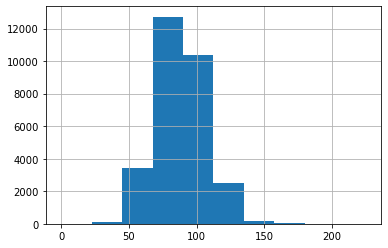

In [64]:
print(total_data["Heart_rate"].value_counts())
total_data["Heart_rate"].hist()

20.0    2364
18.0    2355
12.0    2141
16.0    2109
14.0    2060
        ... 
73.0       1
75.0       1
64.0       1
61.0       1
88.0       1
Name: Respiratory_Rate, Length: 72, dtype: int64


<AxesSubplot:>

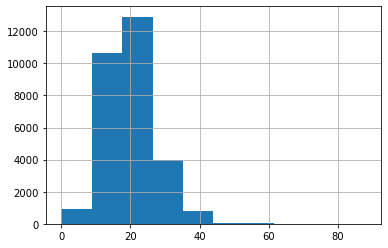

In [65]:
print(total_data["Respiratory_Rate"].value_counts())
total_data["Respiratory_Rate"].hist()

<AxesSubplot:>

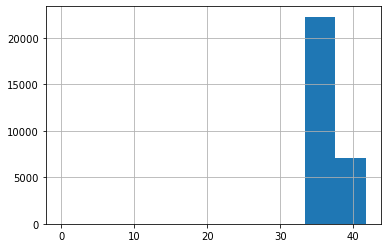

In [66]:
total_data["temperature"].hist()

In [67]:
total_data["temperature"].value_counts()

36.799999    1563
37.000000    1475
36.900002    1465
37.099998    1452
36.700001    1430
             ... 
41.200001       1
41.400002       1
24.400000       1
36.689999       1
4.000000        1
Name: temperature, Length: 95, dtype: int64

0    27576
1     1838
Name: SEPTICEMIA, dtype: int64


<AxesSubplot:>

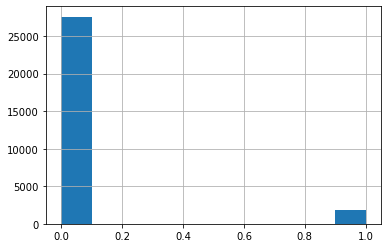

In [68]:
print(total_data["SEPTICEMIA"].value_counts())
total_data["SEPTICEMIA"].hist()

In [69]:
X = total_data.drop(["index", "SEPTICEMIA"], axis = 1)
y = total_data["SEPTICEMIA"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [71]:
from sklearn.preprocessing import StandardScaler
# 정규화

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<AxesSubplot:>

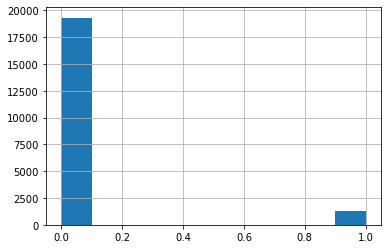

In [72]:
y_train.hist()

In [73]:
# SMOTE 알고리즘 사용하여 label 불균형 손보기
smote = SMOTE(random_state = 0)
X_train_over, Y_train_over = smote.fit_resample(X_train, y_train)

In [74]:
print(y_train.value_counts())
print(Y_train_over.value_counts()) ## ylabel 18015개 생성

0    19302
1     1287
Name: SEPTICEMIA, dtype: int64
0    19302
1    19302
Name: SEPTICEMIA, dtype: int64


In [75]:
print(len(X_train))
print(len(X_train_over)) # X_train 18015개 생성

20589
38604


<AxesSubplot:>

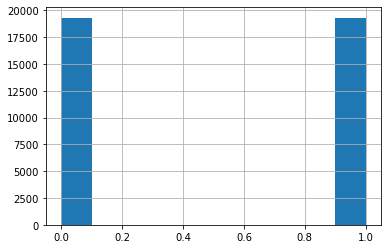

In [76]:
Y_train_over.hist()

In [77]:
X_train_over

array([[ 0.6301206 , -0.51292829,  0.86237947],
       [ 0.12655513,  2.67488088, -0.20899894],
       [ 0.46226544,  1.0809763 ,  0.25016282],
       ...,
       [ 0.74202404, -0.64575367, -1.13460151],
       [-0.30896791,  0.84402802,  1.01543436],
       [ 0.23845857,  3.00989157, -1.17068394]])

In [78]:
## 모델링
models = []
models.append(['Logistic Regression', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['GaussiianNB', GaussianNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
## models.append(['XGBoost', XGBClassifier(eval_metric = 'error')])

list_1 = []

n_splits = 5
sfk = StratifiedKFold(n_splits = n_splits)

for n, (train_idx, validation_idx) in enumerate(sfk.split(X_train_over, Y_train_over)):
    x_train, x_validation = X_train_over[train_idx], X_train_over[validation_idx]
    y_train, y_validation = Y_train_over[train_idx], Y_train_over[validation_idx]
    for m in range(len(models)):
        list_2 = []
        model = models[m][1]
        model.fit(x_train, y_train)
        y_pred = model.predict(x_validation)
        cm = confusion_matrix(y_validation, y_pred) 
        roc = roc_auc_score(y_validation, y_pred) ## roc커브
        precision = precision_score(y_validation, y_pred, average="weighted")
        recall = recall_score(y_validation, y_pred, average="weighted")
        f1 = f1_score(y_validation, y_pred, average="weighted")
        print(models[m][0], ':')
        print(cm)
        print('Accuracy Score: ', accuracy_score(y_validation, y_pred))
        print('')
        print('')
        print('')
        print("ROC AUC Score: {:.2f}".format(roc))
        print('')
        print("Precision: {:.2f}".format(precision))
        print('')
        print("Recall: {:.2f}".format(recall))
        print('')
        print("F1: {:.2F}".format(f1))
        print('-------------------------------')
        print('')
        list_2.append(models[m][0]) 
        list_2.append((accuracy_score(y_validation, y_pred))*100)
        list_2.append(roc)
        list_2.append(recall)
        list_2.append(precision)    
        list_2.append(f1)
        list_1.append(list_2)


model_df = pd.DataFrame(list_1, columns =  ['Model', 'Accuracy','ROC AUC','Precision','Recall','F1'])

model_df

Logistic Regression :
[[2852 1009]
 [1188 2672]]
Accuracy Score:  0.7154513664033156



ROC AUC Score: 0.72

Precision: 0.72

Recall: 0.72

F1: 0.72
-------------------------------

SVM :
[[3710  151]
 [   2 3858]]
Accuracy Score:  0.9801839140007771



ROC AUC Score: 0.98

Precision: 0.98

Recall: 0.98

F1: 0.98
-------------------------------

GaussiianNB :
[[3408  453]
 [1624 2236]]
Accuracy Score:  0.7309933946380003



ROC AUC Score: 0.73

Precision: 0.75

Recall: 0.73

F1: 0.72
-------------------------------

Decision Tree :
[[3861    0]
 [   0 3860]]
Accuracy Score:  1.0



ROC AUC Score: 1.00

Precision: 1.00

Recall: 1.00

F1: 1.00
-------------------------------

Random Forest :
[[3861    0]
 [   0 3860]]
Accuracy Score:  1.0



ROC AUC Score: 1.00

Precision: 1.00

Recall: 1.00

F1: 1.00
-------------------------------

Logistic Regression :
[[2927  934]
 [1235 2625]]
Accuracy Score:  0.7190778396580754



ROC AUC Score: 0.72

Precision: 0.72

Recall: 0.72

F1: 0.72
-------

,Model,Accuracy,ROC AUC,Precision,Recall,F1
0,Logistic Regression,71.545137,0.715448,0.715451,0.715914,0.715297
1,SVM,98.018391,0.980186,0.980184,0.980900,0.980177
2,GaussiianNB,73.099339,0.730974,0.730993,0.754391,0.724654
3,Decision Tree,100.000000,1.000000,1.000000,1.000000,1.000000
4,Random Forest,100.000000,1.000000,1.000000,1.000000,1.000000
5,Logistic Regression,71.907784,0.719073,0.719078,0.720415,0.718649
6,SVM,97.888874,0.978891,0.978889,0.979744,0.978879
7,GaussiianNB,73.656262,0.736542,0.736563,0.763669,0.729605
8,Decision Tree,100.000000,1.000000,1.000000,1.000000,1.000000
9,Random Forest,100.000000,1.000000,1.000000,1.000000,1.000000


# 딥러닝 모델

In [79]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

Using TensorFlow backend.


## ANN 돌리기

In [80]:
model = Sequential()
model.add(Dense(12,activation='relu',input_dim = 3))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = 'rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train,
                    epochs = 50,
                    batch_size = 32,
                    verbose=1,
                   validation_data=(x_validation, y_validation))

Train on 30884 samples, validate on 7720 samples
Epoch 1/50
30884/30884 [==============================] - 5s 151us/step - loss: 0.4748 - accuracy: 0.8050 - val_loss: 0.2972 - val_accuracy: 0.8979
Epoch 2/50
30884/30884 [==============================] - 3s 85us/step - loss: 0.2082 - accuracy: 0.9388 - val_loss: 0.1568 - val_accuracy: 0.9587- loss: 0 - ETA: 0s - los
Epoch 3/50
30884/30884 [==============================] - 3s 89us/step - loss: 0.1211 - accuracy: 0.9697 - val_loss: 0.1047 - val_accuracy: 0.9763 0s - loss:
Epoch 4/50
30884/30884 [==============================] - 3s 88us/step - loss: 0.0839 - accuracy: 0.9819 - val_loss: 0.0780 - val_accuracy: 0.9854
Epoch 5/50
30884/30884 [==============================] - 3s 88us/step - loss: 0.0644 - accuracy: 0.9868 - val_loss: 0.0621 - val_accuracy: 0.9892
Epoch 6/50
30884/30884 [==============================] - 3s 88us/step - loss: 0.0541 - accuracy: 0.9887 - val_loss: 0.0544 - val_accuracy: 0.9880
Epoch 7/50
30884/30884 [========

In [81]:
# train, validation loss값을 보여주는 시각화 
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

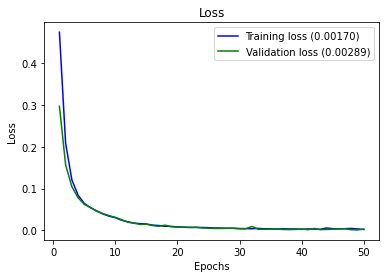

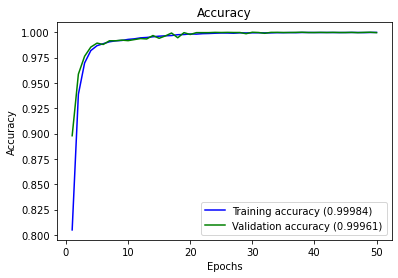

In [82]:
plot_history(history)

In [83]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    confusion matrix 시각화 
    정규화 했을 경우 normalize True를 해줘야함
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    


In [84]:
## 다중, binary 클래스를 분류해주는 시각화
## binary 분류일경우 output에 sigmoid 사용, binary_parameter True를 해줘야함
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):

    # 1. Transform one-hot encoded y_true into their class number
    if not binary:
        y_true = np.argmax(y_true,axis=1)
    
    # 2. Predict classes and stores in y_pred
    y_pred = model.predict_classes(x, batch_size=batch_size)
    
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true,y_pred)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_true,y_pred,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true,y_pred)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)

Accuracy : 0.9992067988668555

Classification Report
              precision    recall  f1-score   support

           0    1.00000   0.99915   0.99958      8274
           1    0.98746   1.00000   0.99369       551

    accuracy                        0.99921      8825
   macro avg    0.99373   0.99958   0.99663      8825
weighted avg    0.99922   0.99921   0.99921      8825

[[8267    7]
 [   0  551]]


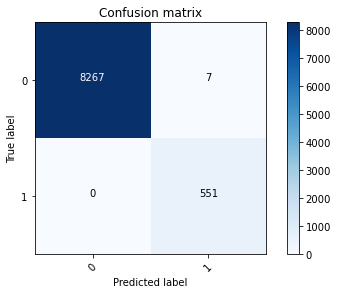

In [85]:
full_multiclass_report(model,X_test, y_test, [0,1], binary = True)